In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_disease_uci.csv')

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df= df.drop(['cp'], axis=1)

In [5]:
df.head()

,id,age,sex,dataset,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
df.isnull()

,id,age,sex,dataset,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False
917,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
918,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False


In [7]:
df.isnull().sum()   #Checking null values per column

id            0
age           0
sex           0
dataset       0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
df.head()

,id,age,sex,dataset,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
df = df.drop(['sex', 'dataset', 'fbs', 'restecg', 'exang', 'slope', 'thal'], axis=1)
    # Removing string columns because for feature(column) scaling we need values.
    # In future we will change the string column in values(bool/int/floot)

In [10]:
df.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0


In [11]:
df.shape

(920, 8)

In [12]:
df.isnull().sum()

id            0
age           0
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
num           0
dtype: int64

In [13]:
# There are 920 rows in total, while 'ca' column get 611 null rows. Therefore, 'ca' column has not that importance in the dataframe so we will drop itdf =
df = df.drop('ca', axis = 1)

In [14]:
help(df.drop)

Help on method drop in module pandas.core.frame:

drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise'
) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.

    Remove rows or columns by specifying label names and corresponding
    axis, or by directly specifying index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.

    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0

In [15]:
df.head()

,id,age,trestbps,chol,thalch,oldpeak,num
0,1,63,145.0,233.0,150.0,2.3,0
1,2,67,160.0,286.0,108.0,1.5,2
2,3,67,120.0,229.0,129.0,2.6,1
3,4,37,130.0,250.0,187.0,3.5,0
4,5,41,130.0,204.0,172.0,1.4,0


In [16]:
df.isnull().sum()

id           0
age          0
trestbps    59
chol        30
thalch      55
oldpeak     62
num          0
dtype: int64

In [17]:
# Still there are several null values in different columns. As there are little row those have null values, so, now we will drop the rows those got null value
df_cleaned = df.dropna()
df_cleaned

,id,age,trestbps,chol,thalch,oldpeak,num
0,1,63,145.0,233.0,150.0,2.3,0
1,2,67,160.0,286.0,108.0,1.5,2
2,3,67,120.0,229.0,129.0,2.6,1
3,4,37,130.0,250.0,187.0,3.5,0
4,5,41,130.0,204.0,172.0,1.4,0
...,...,...,...,...,...,...,...
913,914,62,158.0,170.0,138.0,0.0,1
914,915,46,134.0,310.0,126.0,0.0,2
915,916,54,127.0,333.0,154.0,0.0,1
917,918,55,122.0,223.0,100.0,0.0,2


In [18]:
df.isnull().sum()

id           0
age          0
trestbps    59
chol        30
thalch      55
oldpeak     62
num          0
dtype: int64

In [19]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


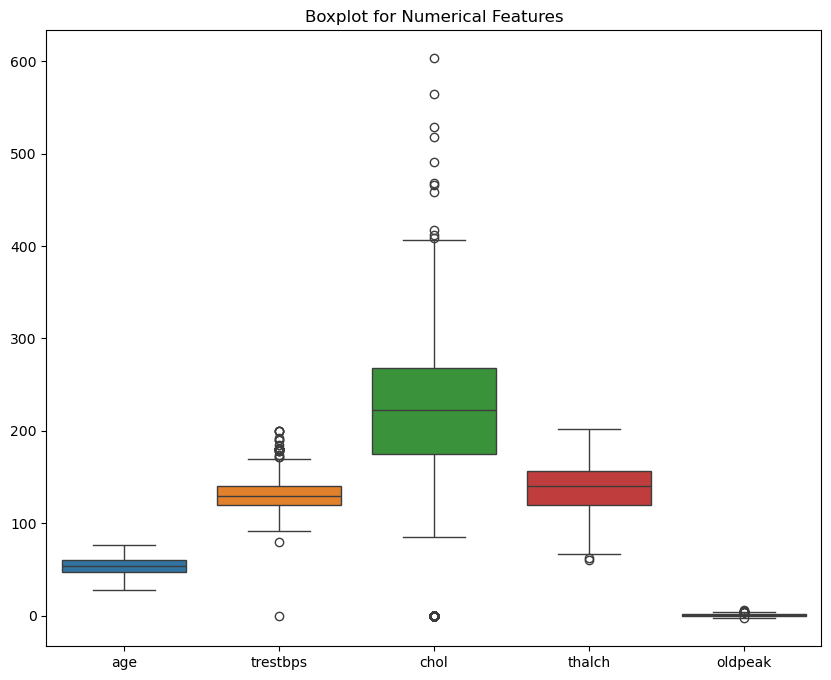

In [20]:
plt.figure(figsize = (10, 8))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])
plt.title('Boxplot for Numerical Features')
plt.show()

In [21]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs
)
    Draw a box plot to show distributions with respect to categories.

    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.


In [22]:
test_df = df.copy()
test_df

,id,age,trestbps,chol,thalch,oldpeak,num
0,1,63,145.0,233.0,150.0,2.3,0
1,2,67,160.0,286.0,108.0,1.5,2
2,3,67,120.0,229.0,129.0,2.6,1
3,4,37,130.0,250.0,187.0,3.5,0
4,5,41,130.0,204.0,172.0,1.4,0
...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,1
916,917,62,NaN,139.0,NaN,NaN,0
917,918,55,122.0,223.0,100.0,0.0,2
918,919,58,NaN,385.0,NaN,NaN,0


In [23]:
test_df['test'] = np.arange(len(test_df))
test_df

,id,age,trestbps,chol,thalch,oldpeak,num,test
0,1,63,145.0,233.0,150.0,2.3,0,0
1,2,67,160.0,286.0,108.0,1.5,2,1
2,3,67,120.0,229.0,129.0,2.6,1,2
3,4,37,130.0,250.0,187.0,3.5,0,3
4,5,41,130.0,204.0,172.0,1.4,0,4
...,...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,1,915
916,917,62,NaN,139.0,NaN,NaN,0,916
917,918,55,122.0,223.0,100.0,0.0,2,917
918,919,58,NaN,385.0,NaN,NaN,0,918


In [24]:
test_df = test_df[test_df['test'] % 2 == 0]
test_df

,id,age,trestbps,chol,thalch,oldpeak,num,test
0,1,63,145.0,233.0,150.0,2.3,0,0
2,3,67,120.0,229.0,129.0,2.6,1,2
4,5,41,130.0,204.0,172.0,1.4,0,4
6,7,62,140.0,268.0,160.0,3.6,3,6
8,9,63,130.0,254.0,147.0,1.4,2,8
...,...,...,...,...,...,...,...,...
910,911,51,114.0,258.0,96.0,1.0,0,910
912,913,53,144.0,300.0,128.0,1.5,3,912
914,915,46,134.0,310.0,126.0,0.0,2,914
916,917,62,NaN,139.0,NaN,NaN,0,916


In [25]:
def outlier_remover(df, columns):
    cleaned_df = df.copy()
    
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1   # Interquartile Range
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
        
    return cleaned_df

In [26]:
columns_to_check = ['trestbps', 'chol', 'thalch', 'oldpeak']
cleaned_df = outlier_remover(df_cleaned, columns_to_check)
cleaned_df

,id,age,trestbps,chol,thalch,oldpeak,num
0,1,63,145.0,233.0,150.0,2.3,0
1,2,67,160.0,286.0,108.0,1.5,2
2,3,67,120.0,229.0,129.0,2.6,1
3,4,37,130.0,250.0,187.0,3.5,0
4,5,41,130.0,204.0,172.0,1.4,0
...,...,...,...,...,...,...,...
913,914,62,158.0,170.0,138.0,0.0,1
914,915,46,134.0,310.0,126.0,0.0,2
915,916,54,127.0,333.0,154.0,0.0,1
917,918,55,122.0,223.0,100.0,0.0,2
